### Will the current factory capacity be sufficient to meet the future demand from the four continental markets?
#### The notebook explores the question.

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing

In [168]:
def mape(y_actual, y_pred):
    y_actual, y_pred = np.array(y_actual), np.array(y_pred)
    return np.mean(np.abs((y_actual - y_pred) / y_actual))

In [169]:
df = pd.read_excel('IMV3.xlsx', index_col=0)

In [170]:
display(df.head())

,July,August,September,October,November,December,January,February,March,April,May,June,Total
Year,,,,,,,,,,,,,
2014,187,242,173,158,256,199,106,183,140,207,242,164,2257
2015,186,226,101,181,268,164,311,249,340,306,298,208,2838
2016,287,281,164,123,387,269,218,322,291,280,478,190,3290
2017,373,339,410,586,480,576,406,210,548,437,548,228,5141


In [171]:
df.drop(['Total'], axis=1, inplace=True)

In [172]:
df.dtypes

July         int64
August       int64
September    int64
October      int64
November     int64
December     int64
January      int64
February     int64
March        int64
April        int64
May          int64
June         int64
dtype: object

In [290]:
df.sum()

July         1033
August       1088
September     848
October      1048
November     1391
December     1208
January      1041
February      964
March        1319
April        1230
May          1566
June          790
dtype: int64

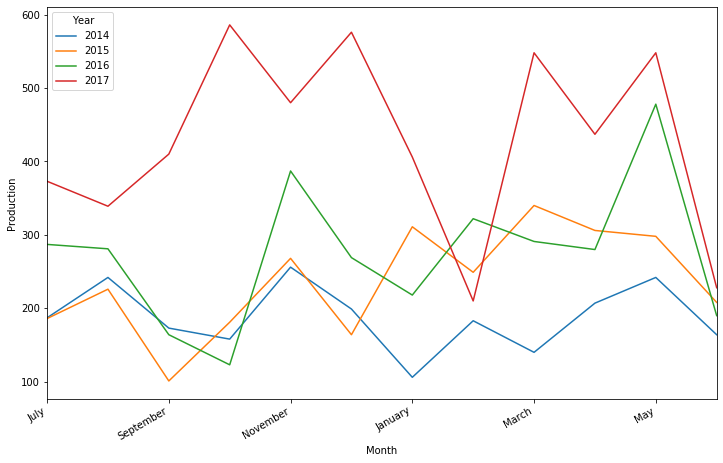

In [173]:
ax = df.T.plot(figsize=(12, 8))
ax.set_xlabel("Month")
ax.set_ylabel("Production")
plt.gcf().autofmt_xdate()

In [261]:
s2014 = df.iloc[0]
s2015 = df.iloc[1]
s2016 = df.iloc[2]
s2017 = df.iloc[3]

In [175]:
s2014

July         187
August       242
September    173
October      158
November     256
December     199
January      106
February     183
March        140
April        207
May          242
June         164
Name: 2014, dtype: int64

In [318]:
#alpha = 0.1

#fit2014 = SimpleExpSmoothing(s2014).fit(initial_level=0.2, optimized=True)

train = df.sum()
for alpha in np.arange(0.0, 1, 0.05):
    fit = SimpleExpSmoothing(train).fit(smoothing_level=alpha, optimized=True)
    fcast = fit.predict(0).rename(r'$\alpha=%s$'%fit.model.params['smoothing_level'])
    print('alpha=', alpha, ', MAPE=', mape(train, fcast))
#fit2014.fittedfcast

alpha= 0.0 , MAPE= 0.1647154656459581
alpha= 0.05 , MAPE= 0.16584934480690275
alpha= 0.1 , MAPE= 0.1655627637310597
alpha= 0.15000000000000002 , MAPE= 0.16458628228031105
alpha= 0.2 , MAPE= 0.16772834517414092
alpha= 0.25 , MAPE= 0.17185196914706627
alpha= 0.30000000000000004 , MAPE= 0.1755186428027373
alpha= 0.35000000000000003 , MAPE= 0.17878539601785956
alpha= 0.4 , MAPE= 0.18168143180548146
alpha= 0.45 , MAPE= 0.18421322375523042
alpha= 0.5 , MAPE= 0.18637334497866095
alpha= 0.55 , MAPE= 0.18923003607796154
alpha= 0.6000000000000001 , MAPE= 0.1933612647477538
alpha= 0.65 , MAPE= 0.19711815001650557
alpha= 0.7000000000000001 , MAPE= 0.2004852650775594
alpha= 0.75 , MAPE= 0.20454675900030758
alpha= 0.8 , MAPE= 0.20911114611154416
alpha= 0.8500000000000001 , MAPE= 0.21343630111341041
alpha= 0.9 , MAPE= 0.21753309526423473
alpha= 0.9500000000000001 , MAPE= 0.22141257650026358


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsup

In [252]:
#fit2014.fcastvalues, fit2014.fittedvalues

In [253]:
#fcast2014

In [254]:
#ax = s2014.plot(marker='o', color='black', figsize=(12,8))
##fit2014.fittedvalues.plot(marker='o', ax=ax, color='green')
#fcast2014.plot(marker='o', ax=ax, color='green', legend=True)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


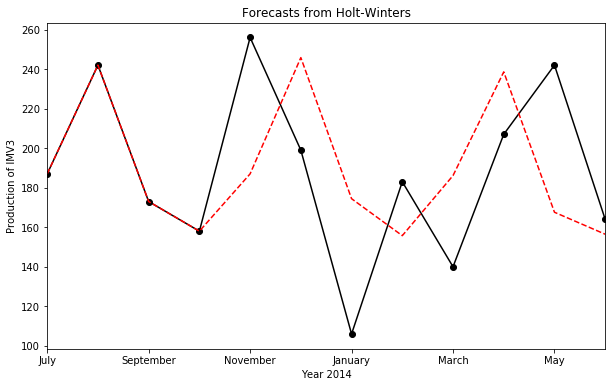

In [313]:
train = s2014

fit1 = ExponentialSmoothing(train, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
ax = train.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters" )
ax.set_ylabel("Production of IMV3")
ax.set_xlabel("Year" + " 2014")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')

In [307]:
fit1.fittedvalues

July         373.000000
August       339.000000
September    410.000000
October      586.000000
November     373.000000
December     345.601938
January      429.598278
February     602.230350
March        457.562832
April        530.336883
May          389.823422
June         298.591902
dtype: float64

In [308]:
mape(train, fit1.fittedvalues)

0.2938062148864326